In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
data=pd.read_csv('/content/sample_data/california_housing_test.csv')

Primero se debe identificar el contexto de la información que tenemos, para ello miramos los tipos de datos que tenemos, las estadísticas, si hay datos vacíos, si hay valores que se alejan demasiado del promedio y las correlaciones con nuestra variable de interés

In [ ]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [ ]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,205846.27500
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,113119.68747
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,22500.00000
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,121200.00000
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,177650.00000
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,263975.00000
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,500001.00000


In [ ]:
stats=data.describe()
stats.loc['Range']=stats.loc['max']-stats.loc['min']
stats

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,205846.27500
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,113119.68747
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,22500.00000
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,121200.00000
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,177650.00000
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,263975.00000
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,500001.00000
Range,9.690000,9.36000,51.000000,30444.000000,5417.000000,11930.000000,4928.00000,14.500200,477501.00000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


In [ ]:
data.columns.tolist()

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

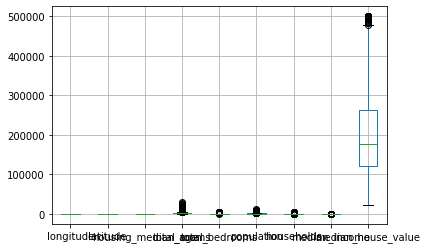

In [ ]:
data.boxplot()

In [ ]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [ ]:
dup_removed = data.drop_duplicates()

No hay variables con valor nulo o ID repetidos
Sin embargo, se ve un gran cezgo en la variable house_Value con el que se debe tratar. Para hacer regresión lineal se requieren varios supuestos: linealidad, independencia, homocedasticidad, normalidad y no colinealidad,

En la parte de normalidad no se encuentran datos normales, por lo que se debe realizar una transformación, entre las cuales la mas usada es log

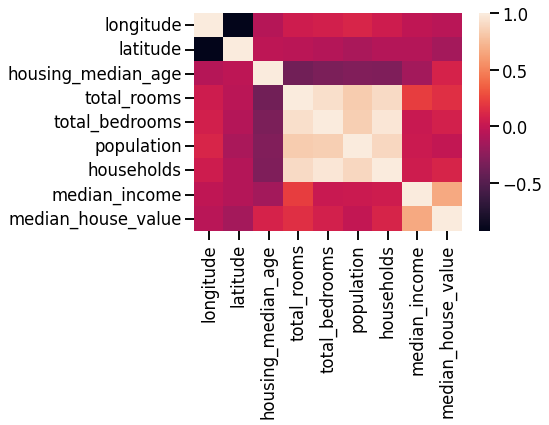

In [ ]:
sns.heatmap(data.corr())

In [ ]:
data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925017,-0.064203,0.049865,0.070869,0.111572,0.051062,-0.018701,-0.050662
latitude,-0.925017,1.000000,-0.025143,-0.039632,-0.068245,-0.117318,-0.068296,-0.072363,-0.138428
housing_median_age,-0.064203,-0.025143,1.000000,-0.367850,-0.323154,-0.299888,-0.305171,-0.144315,0.091409
total_rooms,0.049865,-0.039632,-0.367850,1.000000,0.937749,0.838867,0.914116,0.221249,0.160427
total_bedrooms,0.070869,-0.068245,-0.323154,0.937749,1.000000,0.856387,0.970758,0.024025,0.082279
population,0.111572,-0.117318,-0.299888,0.838867,0.856387,1.000000,0.895530,0.032361,-0.001192
households,0.051062,-0.068296,-0.305171,0.914116,0.970758,0.895530,1.000000,0.048625,0.100176
median_income,-0.018701,-0.072363,-0.144315,0.221249,0.024025,0.032361,0.048625,1.000000,0.672695
median_house_value,-0.050662,-0.138428,0.091409,0.160427,0.082279,-0.001192,0.100176,0.672695,1.000000


select_dtypes= Return a subset of the DataFrame’s columns based on the column dtypes.

En este caso todos los daltos son de ese tipo

In [ ]:
hous_num = data.select_dtypes(include = ['float64', 'int64'])
hous_num_corr = data.corr()['median_house_value'][:-1] # -1 means that the latest row is SalePrice
top_features = hous_num_corr[abs(hous_num_corr) > 0.5].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(top_features), top_features))

There is 1 strongly correlated values with SalePrice:
median_income    0.672695
Name: median_house_value, dtype: float64


In [ ]:
hous_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


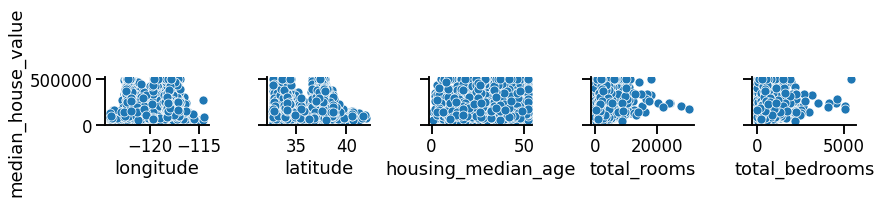

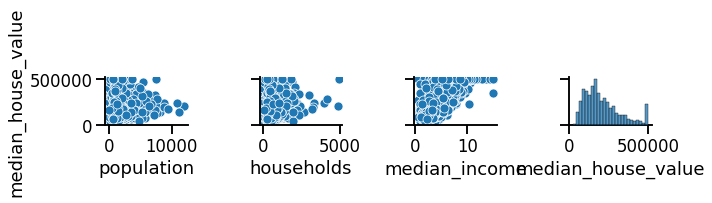

In [ ]:
for i in range(0, len(data.columns), 5):
    sns.pairplot(data=hous_num,
                x_vars=hous_num.columns[i:i+5],
                y_vars=['median_house_value'])

Median_hoyse_value tiene mayor correlación con:
1. median_income
2. total_rooms
3. Latitude
4. households


In [ ]:
data_f=(data[['median_house_value','median_income','total_rooms','latitude','households']])
data_f.head()
hous_num = data_f.select_dtypes(include = ['float64', 'int64'])
hous_num

,median_house_value,median_income,total_rooms,latitude,households
0,344700.0,6.6085,3885.0,37.37,606.0
1,176500.0,3.5990,1510.0,34.26,277.0
2,270500.0,5.7934,3589.0,33.78,495.0
3,330000.0,6.1359,67.0,33.82,11.0
4,81700.0,2.9375,1241.0,36.33,237.0
...,...,...,...,...,...
2995,225000.0,1.1790,1450.0,34.42,607.0
2996,237200.0,3.3906,5257.0,34.06,1036.0
2997,62000.0,2.2895,956.0,36.30,220.0
2998,162500.0,3.2708,96.0,34.10,14.0


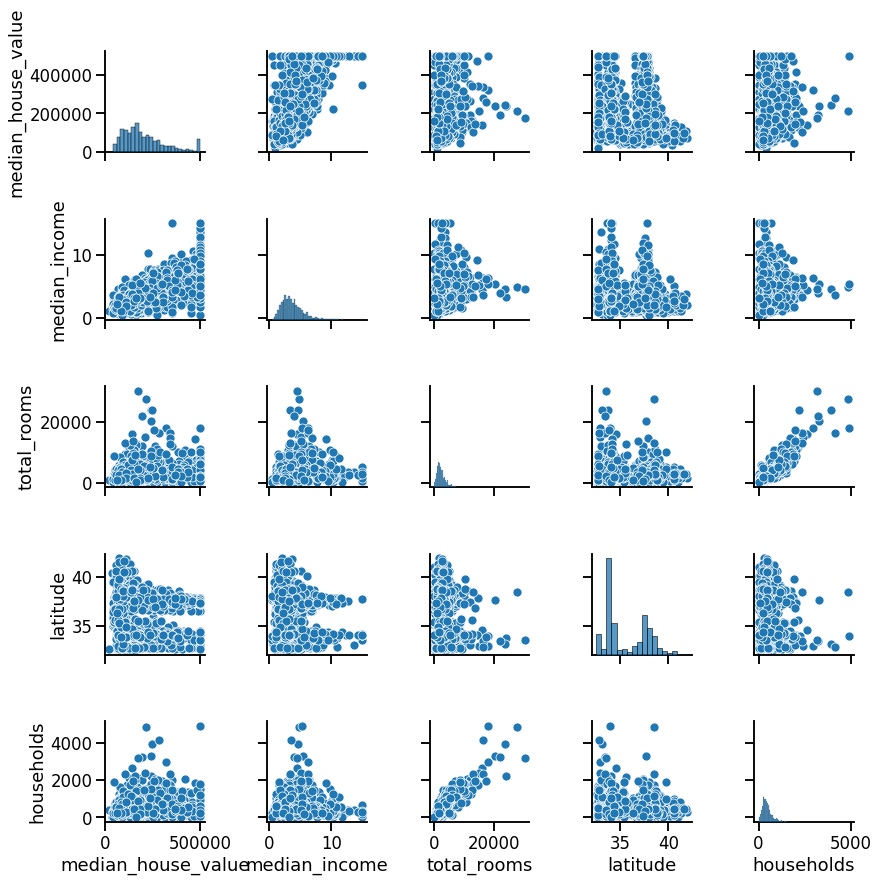

In [ ]:
sns.set_context('talk')
sns.pairplot(data_f)

In [ ]:
data_may=data[(data['median_house_value']>270500)]
data_may.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
18,-118.88,34.21,26.0,1590.0,196.0,654.0,199.0,6.5851,300000.0
19,-122.59,38.01,35.0,8814.0,1307.0,3450.0,1258.0,6.1724,414300.0
25,-118.03,34.16,36.0,1401.0,218.0,667.0,225.0,7.1615,484700.0


Transformamos las variables para que tengan un comportamiento normal

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


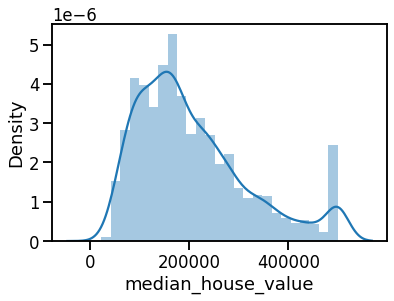

In [ ]:
sp_notransformed = sns.distplot(data['median_house_value'])

Pensemos un momento en los logaritmos decimales (base 10). En la escala logarítmica hay la misma distancia entre 1 y 10 que entre 10 y 100 y que entre 100 y 1000. ¿Qué quiere decir esto?. Pues que si transformamos cada variable en su logaritmo, los valores entre 1 y 10 se expandirán, mientras que los más altos se comprimirán. Por eso la transformación logarítmica es útil para transformar distribuciones con sesgo positivo (con cola más larga hacia la derecha): la parte izquierda se expandirá, mientras que la derecha se comprimirá, favoreciendo que la curva resultante se ajuste mejor a una normal.



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


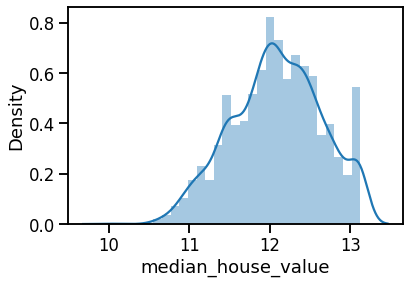

In [ ]:
log_transformed = np.log(data['median_house_value'])
sp_transformed = sns.distplot(log_transformed)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

Normalizando los datos

Tomamos solamente los datos que son de tipo float. Usamos luego la función MinMazScaler para normalizar y ahora los datos con fit_transform se vuelven un numpy

In [ ]:
norm_data = MinMaxScaler().fit_transform(hous_num)
norm_data

array([[0.67476298, 0.42127695, 0.12741427, 0.51388889, 0.12256494],
       [0.32251241, 0.21372809, 0.04940218, 0.18162393, 0.05580357],
       [0.51937064, 0.36506393, 0.1176915 , 0.13034188, 0.10004058],
       ...,
       [0.08272234, 0.12341899, 0.03120484, 0.39957265, 0.04423701],
       [0.2931931 , 0.19109392, 0.00295625, 0.16452991, 0.00243506],
       [1.        , 0.55591647, 0.05777822, 0.19871795, 0.0523539 ]])

También se pueden estandarizar los datos

In [ ]:
scaled_data = StandardScaler().fit_transform(hous_num)
scaled_data

array([[ 1.22769852,  1.51074547,  0.59641845,  0.81463305,  0.31773437],
       [-0.25947002, -0.11232419, -0.50555005, -0.64593087, -0.58274291],
       [ 0.57164676,  1.0711495 ,  0.45907837, -0.87135553,  0.01392592],
       ...,
       [-1.27184099, -0.81855768, -0.7625987 ,  0.31212392, -0.73875265],
       [-0.38325337, -0.2893275 , -1.16162729, -0.72107242, -1.30257733],
       [ 2.60081839,  2.56365089, -0.38723343, -0.57078932, -0.62927213]])

Manejo de outliers

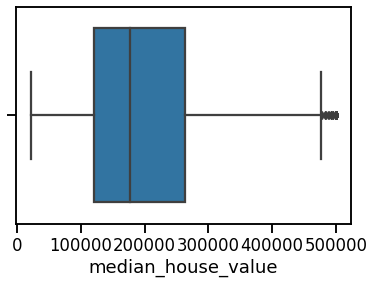

In [ ]:
sns.boxplot(x=hous_num['median_house_value'])

Como podemos ver en estos dos gráficos, tenemos algunos puntos que están trazados fuera del área del gráfico de caja y que se desvían mucho del resto de la población. Quitarlos o conservarlos dependerá en gran medida de la comprensión de nuestros datos y del tipo de análisis a realizar. En este caso, los puntos que están fuera de nuestros diagramas de caja en el 'Área del lote' y el 'Precio de venta' pueden ser los puntos de datos verdaderos y no es necesario eliminarlos.

Análisis bi-variado

Se utiliza para identificar si es necesaria o no la eliminación de outliers

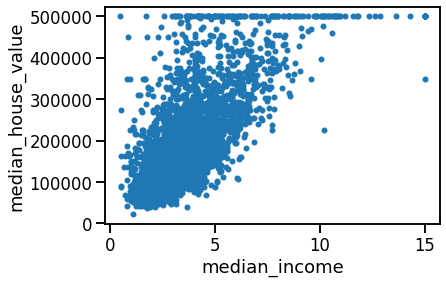

In [ ]:
price_area = data_f.plot.scatter(x='median_income',
                      y='median_house_value')

Del gráfico anterior, hay dos valores por encima de 10 que se desvían del resto de la población y no parecen seguir la tendencia. Se puede especular por qué sucede esto, pero para los fines de esta práctica de laboratorio, podemos eliminarlos.

Las otras dos observaciones en la parte superior también se están desviando del resto de los puntos, pero también parecen estar siguiendo la tendencia, por lo que, quizás, se puedan mantener.

In [ ]:
data_f.sort_values(by = 'median_house_value', ascending = False)[:2]

,median_house_value,median_income,total_rooms,latitude,households
2999,500001.0,8.5608,1765.0,34.42,260.0
2053,500001.0,10.2811,2999.0,37.45,369.0


In [ ]:
data_so=data_f[(data_f['median_income'])<10]

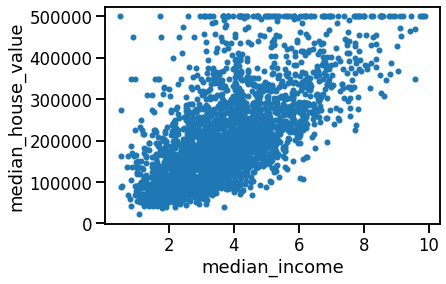

In [ ]:
price_area = data_so.plot.scatter(x='median_income',
                      y='median_house_value')

La puntuación Z es otra forma de identificar valores atípicos matemáticamente. La puntuación Z es el número con signo de desviaciones estándar por las que el valor de una observación o punto de datos está por encima del valor medio de lo que se observa o mide. En otras palabras, la puntuación Z es el valor que cuantifica la relación entre un punto de datos y una desviación estándar y los valores medios de un grupo de puntos. Los puntos de datos que estén demasiado lejos de cero se tratarán como valores atípicos. En la mayoría de los casos, se utiliza un umbral de 3 o -3. Por ejemplo, si el valor de la puntuación Z es mayor o menor que 3 o -3 desviaciones estándar respectivamente, ese punto de datos se identificará como un valor atípico.

In [ ]:
data_so['z_total_rooms'] = stats.zscore(data_so['total_rooms'])
data_so[['total_rooms','z_total_rooms']].describe().round(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,total_rooms,z_total_rooms
count,2960.000,2960.000
mean,2592.883,0.000
std,2152.296,1.000
min,6.000,-1.202
25%,1397.250,-0.556
50%,2104.000,-0.227
75%,3123.250,0.246
max,30450.000,12.945


Los resultados escalados muestran una media de 0,000 y una desviación estándar de 1,000, lo que indica que los valores transformados se ajustan al modelo de escala z. El valor máximo de 12.945 es una prueba más de la presencia de valores atípicos, ya que está muy por encima del límite de puntuación z de +3.